# Notebook 10: Neural vs QML Comparison

**Purpose**: Compare neural network models with quantum ML models.

**Inputs**:
- `neural_metrics.csv`
- `qml_metrics.csv`

**Outputs**:
- Comparison visualizations → `charts/`

---

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Paths
BASE_DIR = Path('.').resolve().parent
RESULTS_DIR = BASE_DIR / 'results'
CHARTS_DIR = BASE_DIR / 'charts'
CHARTS_DIR.mkdir(exist_ok=True)

# Style
plt.style.use('seaborn-v0_8-whitegrid')
colors = {'neural': '#e74c3c', 'qml': '#9b59b6'}

print(f"Charts will be saved to: {CHARTS_DIR}")

Charts will be saved to: C:\Users\mostr\OneDrive\Documents\GitHub\Proj\Anomaly-detection-in-finance-using-QML\charts


In [2]:
# Load metrics
neural_df = pd.read_csv(RESULTS_DIR / 'neural_metrics.csv')
qml_df = pd.read_csv(RESULTS_DIR / 'qml_metrics.csv')

neural_df['category'] = 'Neural'
qml_df['category'] = 'QML'

combined_df = pd.concat([neural_df, qml_df], ignore_index=True)

print(f"Neural models: {len(neural_df)}")
print(f"QML models: {len(qml_df)}")

Neural models: 5
QML models: 5


In [3]:
# Display results
print("\nNeural Models:")
print(neural_df[['model', 'f1_score', 'roc_auc', 'train_time']].to_string(index=False))
print("\nQML Models:")
qml_cols = ['model', 'f1_score', 'roc_auc', 'train_time']
if 'n_qubits' in qml_df.columns:
    qml_cols.append('n_qubits')
print(qml_df[qml_cols].to_string(index=False))


Neural Models:
           model  f1_score  roc_auc  train_time
        Deep_MLP  0.947368 0.946447    1.977893
Deep_Autoencoder  0.425532 0.896053   11.250247
             VAE  0.244898 0.825263    6.713579
LSTM_Autoencoder  0.240000 0.831447    5.043341
       Deep_OCNN  0.320000 0.821184    2.723756

QML Models:
              model  f1_score  roc_auc  train_time  n_qubits
                VQC  0.095238 0.595789  194.096652         4
         Hybrid_QNN  0.000000 0.368421  128.818377         4
               QSVM  0.000000 0.551020   12.204610         4
Quantum_Autoencoder  0.000000 0.423158    6.928312         4
               QGAN  0.095238 0.705263   19.801457         2


## Performance Comparison

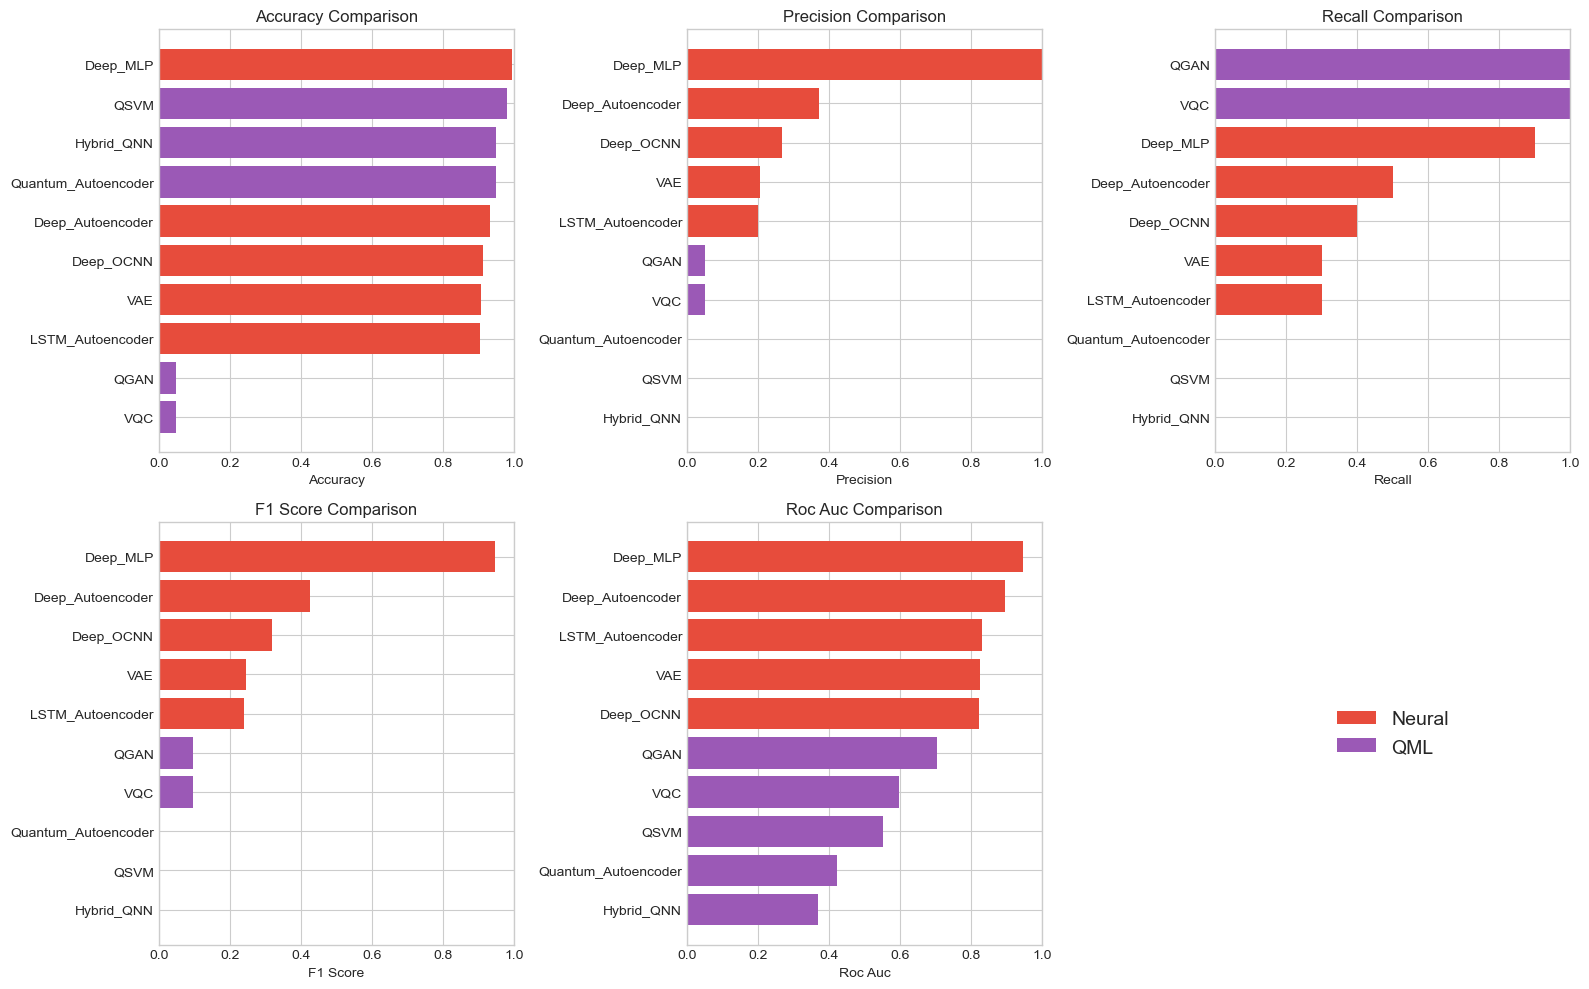

✅ Saved: neural_vs_qml_metrics.png


In [4]:
# Metric comparison
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]
    data = combined_df.sort_values(metric, ascending=True)
    colors_list = [colors['neural'] if c == 'Neural' else colors['qml'] 
                   for c in data['category']]
    
    ax.barh(data['model'], data[metric], color=colors_list)
    ax.set_xlabel(metric.replace('_', ' ').title())
    ax.set_title(f'{metric.replace("_", " ").title()} Comparison')
    ax.set_xlim([0, 1])

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors['neural'], label='Neural'),
                   Patch(facecolor=colors['qml'], label='QML')]
axes[-1].legend(handles=legend_elements, loc='center', fontsize=14)
axes[-1].axis('off')

plt.tight_layout()
plt.savefig(CHARTS_DIR / 'neural_vs_qml_metrics.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"✅ Saved: neural_vs_qml_metrics.png")

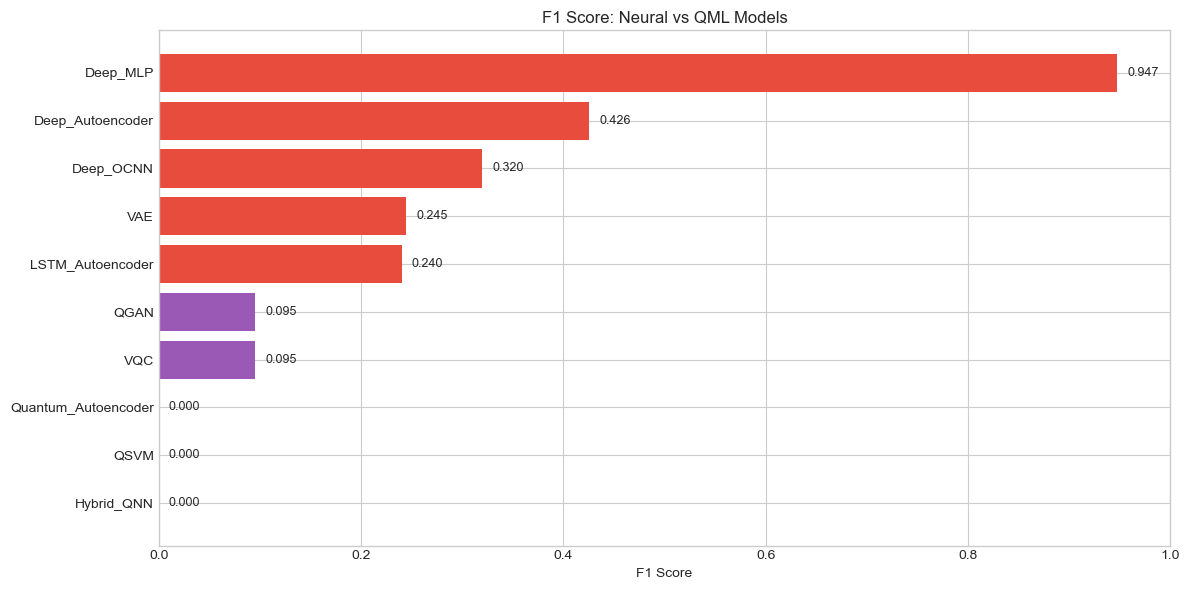

✅ Saved: neural_vs_qml_f1_score.png


In [5]:
# F1 Score comparison
fig, ax = plt.subplots(figsize=(12, 6))

data = combined_df.sort_values('f1_score', ascending=True)
colors_list = [colors['neural'] if c == 'Neural' else colors['qml'] 
               for c in data['category']]

bars = ax.barh(data['model'], data['f1_score'], color=colors_list)
ax.set_xlabel('F1 Score')
ax.set_title('F1 Score: Neural vs QML Models')
ax.set_xlim([0, 1])

for bar, val in zip(bars, data['f1_score']):
    ax.text(val + 0.01, bar.get_y() + bar.get_height()/2, f'{val:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig(CHARTS_DIR / 'neural_vs_qml_f1_score.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"✅ Saved: neural_vs_qml_f1_score.png")

## Scalability Analysis

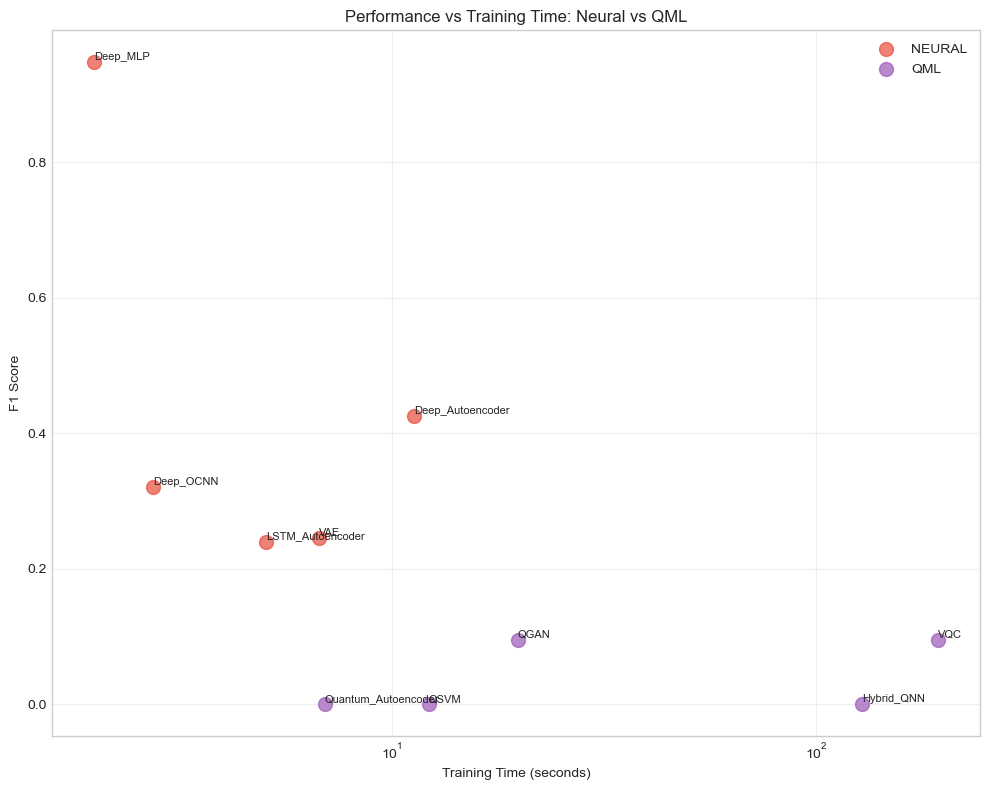

✅ Saved: neural_vs_qml_scalability.png


In [6]:
# Performance vs Training Time scatter
fig, ax = plt.subplots(figsize=(10, 8))

for category, color in colors.items():
    if category == 'neural':
        data = neural_df
    else:
        data = qml_df
    
    ax.scatter(data['train_time'], data['f1_score'], 
               c=color, label=category.upper(), s=100, alpha=0.7)
    
    for _, row in data.iterrows():
        ax.annotate(row['model'], (row['train_time'], row['f1_score']),
                   fontsize=8, ha='left', va='bottom')

ax.set_xlabel('Training Time (seconds)')
ax.set_ylabel('F1 Score')
ax.set_title('Performance vs Training Time: Neural vs QML')
ax.legend()
ax.set_xscale('log')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(CHARTS_DIR / 'neural_vs_qml_scalability.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"✅ Saved: neural_vs_qml_scalability.png")

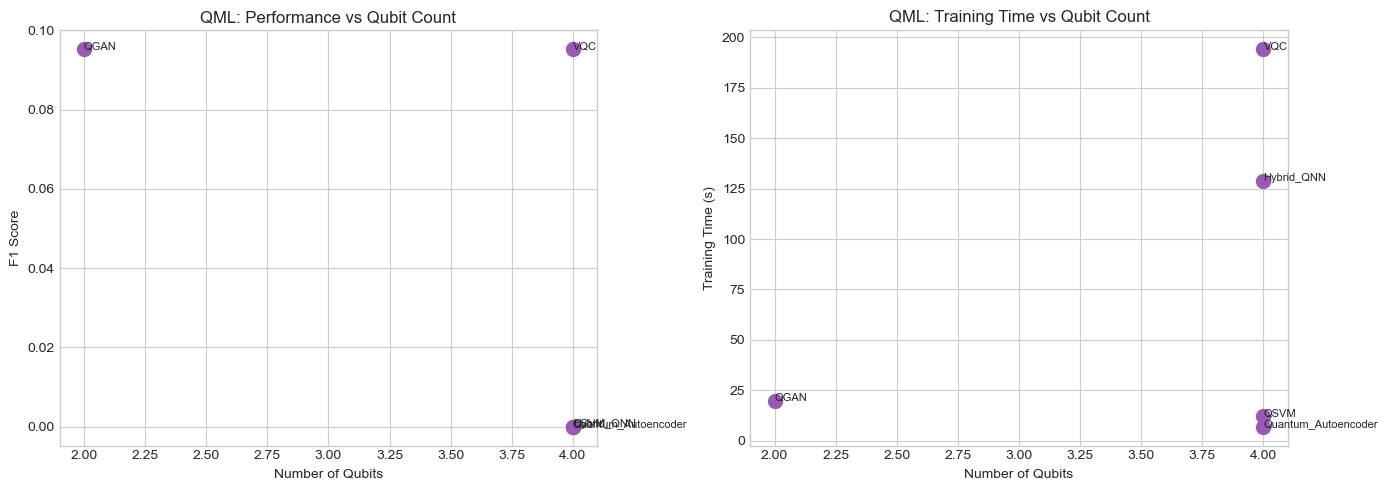

✅ Saved: qml_qubit_analysis.png


In [7]:
# QML-specific: Performance vs Qubits
if 'n_qubits' in qml_df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    ax1 = axes[0]
    ax1.scatter(qml_df['n_qubits'], qml_df['f1_score'], s=100, c=colors['qml'])
    for _, row in qml_df.iterrows():
        ax1.annotate(row['model'], (row['n_qubits'], row['f1_score']), fontsize=8)
    ax1.set_xlabel('Number of Qubits')
    ax1.set_ylabel('F1 Score')
    ax1.set_title('QML: Performance vs Qubit Count')
    
    ax2 = axes[1]
    ax2.scatter(qml_df['n_qubits'], qml_df['train_time'], s=100, c=colors['qml'])
    for _, row in qml_df.iterrows():
        ax2.annotate(row['model'], (row['n_qubits'], row['train_time']), fontsize=8)
    ax2.set_xlabel('Number of Qubits')
    ax2.set_ylabel('Training Time (s)')
    ax2.set_title('QML: Training Time vs Qubit Count')
    
    plt.tight_layout()
    plt.savefig(CHARTS_DIR / 'qml_qubit_analysis.png', dpi=150, bbox_inches='tight')
    plt.show()
    print(f"✅ Saved: qml_qubit_analysis.png")

In [8]:
# Best model per metric comparison
print("\n" + "="*70)
print("BEST MODEL PER METRIC: NEURAL VS QML")
print("="*70)

metrics_to_compare = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']
best_results = []

for metric in metrics_to_compare:
    # Best neural
    best_neural_idx = neural_df[metric].idxmax()
    best_neural = neural_df.loc[best_neural_idx]
    
    # Best QML
    best_qml_idx = qml_df[metric].idxmax()
    best_qml = qml_df.loc[best_qml_idx]
    
    # Determine winner
    if best_neural[metric] > best_qml[metric]:
        winner = 'Neural'
        winner_model = best_neural['model']
    else:
        winner = 'QML'
        winner_model = best_qml['model']
    
    best_results.append({
        'Metric': metric.replace('_', ' ').title(),
        'Best Neural': f"{best_neural['model']} ({best_neural[metric]:.4f})",
        'Best QML': f"{best_qml['model']} ({best_qml[metric]:.4f})",
        'Winner': f"{winner}: {winner_model}"
    })
    
    print(f"\n{metric.replace('_', ' ').title()}:")
    print(f"  Best Neural: {best_neural['model']} = {best_neural[metric]:.4f}")
    print(f"  Best QML: {best_qml['model']} = {best_qml[metric]:.4f}")
    print(f"  🏆 WINNER: {winner} ({winner_model})")

# Training time (lower is better)
print(f"\nTraining Time (lower is better):")
fastest_neural = neural_df.loc[neural_df['train_time'].idxmin()]
fastest_qml = qml_df.loc[qml_df['train_time'].idxmin()]

print(f"  Fastest Neural: {fastest_neural['model']} = {fastest_neural['train_time']:.4f}s")
print(f"  Fastest QML: {fastest_qml['model']} = {fastest_qml['train_time']:.4f}s")

if fastest_neural['train_time'] < fastest_qml['train_time']:
    print(f"  🏆 WINNER: Neural ({fastest_neural['model']})")
else:
    print(f"  🏆 WINNER: QML ({fastest_qml['model']})")


BEST MODEL PER METRIC: NEURAL VS QML

Accuracy:
  Best Neural: Deep_MLP = 0.9950
  Best QML: QSVM = 0.9800
  🏆 WINNER: Neural (Deep_MLP)

Precision:
  Best Neural: Deep_MLP = 1.0000
  Best QML: VQC = 0.0500
  🏆 WINNER: Neural (Deep_MLP)

Recall:
  Best Neural: Deep_MLP = 0.9000
  Best QML: VQC = 1.0000
  🏆 WINNER: QML (VQC)

F1 Score:
  Best Neural: Deep_MLP = 0.9474
  Best QML: VQC = 0.0952
  🏆 WINNER: Neural (Deep_MLP)

Roc Auc:
  Best Neural: Deep_MLP = 0.9464
  Best QML: QGAN = 0.7053
  🏆 WINNER: Neural (Deep_MLP)

Training Time (lower is better):
  Fastest Neural: Deep_MLP = 1.9779s
  Fastest QML: Quantum_Autoencoder = 6.9283s
  🏆 WINNER: Neural (Deep_MLP)


In [9]:
# Save summary
best_df = pd.DataFrame(best_results)
print("\n" + "="*70)
print("SUMMARY TABLE")
print("="*70)
print(best_df.to_string(index=False))

best_df.to_csv(RESULTS_DIR / 'neural_vs_qml_best.csv', index=False)
print(f"\n✅ Saved: neural_vs_qml_best.csv")


SUMMARY TABLE
   Metric       Best Neural      Best QML           Winner
 Accuracy Deep_MLP (0.9950) QSVM (0.9800) Neural: Deep_MLP
Precision Deep_MLP (1.0000)  VQC (0.0500) Neural: Deep_MLP
   Recall Deep_MLP (0.9000)  VQC (1.0000)         QML: VQC
 F1 Score Deep_MLP (0.9474)  VQC (0.0952) Neural: Deep_MLP
  Roc Auc Deep_MLP (0.9464) QGAN (0.7053) Neural: Deep_MLP

✅ Saved: neural_vs_qml_best.csv


In [10]:
# Overall best
print("\n" + "="*70)
print("OVERALL BEST MODELS")
print("="*70)

best_f1 = combined_df.loc[combined_df['f1_score'].idxmax()]
best_auc = combined_df.loc[combined_df['roc_auc'].idxmax()]

print(f"\n🥇 Best by F1: {best_f1['model']} ({best_f1['category']}) = {best_f1['f1_score']:.4f}")
print(f"🥇 Best by AUC: {best_auc['model']} ({best_auc['category']}) = {best_auc['roc_auc']:.4f}")

print("\n✅ Notebook 10 Complete!")


OVERALL BEST MODELS

🥇 Best by F1: Deep_MLP (Neural) = 0.9474
🥇 Best by AUC: Deep_MLP (Neural) = 0.9464

✅ Notebook 10 Complete!
